In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Sustainable Lifestyle Rating Dataset

In [2]:
SUST_LIFESTYLE_DF_PATH = "data/lifestyle_sustainability_data.csv"

In [3]:
df_sust_lifestyle = pd.read_csv(SUST_LIFESTYLE_DF_PATH)
print(df_sust_lifestyle.shape)
print(df_sust_lifestyle.columns)
print(df_sust_lifestyle.dtypes)
df_sust_lifestyle.head()

(499, 20)
Index(['ParticipantID', 'Age', 'Location', 'DietType', 'LocalFoodFrequency',
       'TransportationMode', 'EnergySource', 'HomeType', 'HomeSize',
       'ClothingFrequency', 'SustainableBrands', 'EnvironmentalAwareness',
       'CommunityInvolvement', 'MonthlyElectricityConsumption',
       'MonthlyWaterConsumption', 'Gender', 'UsingPlasticProducts',
       'DisposalMethods', 'PhysicalActivities', 'Rating'],
      dtype='object')
ParticipantID                     int64
Age                               int64
Location                         object
DietType                         object
LocalFoodFrequency               object
TransportationMode               object
EnergySource                     object
HomeType                         object
HomeSize                          int64
ClothingFrequency                object
SustainableBrands                  bool
EnvironmentalAwareness            int64
CommunityInvolvement             object
MonthlyElectricityConsumption     in

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [4]:
df_sust_lifestyle.isna().sum()

ParticipantID                      0
Age                                0
Location                           0
DietType                           0
LocalFoodFrequency                 0
TransportationMode                 0
EnergySource                       0
HomeType                           0
HomeSize                           0
ClothingFrequency                  0
SustainableBrands                  0
EnvironmentalAwareness             0
CommunityInvolvement             118
MonthlyElectricityConsumption      0
MonthlyWaterConsumption            0
Gender                             0
UsingPlasticProducts               0
DisposalMethods                    0
PhysicalActivities               108
Rating                             0
dtype: int64

In [5]:
df_sust_lifestyle.groupby("Rating").size()

Rating
1     97
2     34
3    101
4     91
5    176
dtype: int64

In [6]:
df_sust_lifestyle["ParticipantID"].nunique()

499

In [7]:
non_numeric_cols = df_sust_lifestyle.select_dtypes(exclude="number").columns
non_numeric_cols

Index(['Location', 'DietType', 'LocalFoodFrequency', 'TransportationMode',
       'EnergySource', 'HomeType', 'ClothingFrequency', 'SustainableBrands',
       'CommunityInvolvement', 'Gender', 'UsingPlasticProducts',
       'DisposalMethods', 'PhysicalActivities'],
      dtype='object')

In [8]:
for non_numeric_col in non_numeric_cols:
    total_classes = df_sust_lifestyle[non_numeric_col].nunique()
    classes = df_sust_lifestyle[non_numeric_col].unique()
    print(f"{non_numeric_col} | Classes: {total_classes} -> {classes}")

Location | Classes: 3 -> ['Urban' 'Suburban' 'Rural']
DietType | Classes: 3 -> ['Mostly Plant-Based' 'Balanced' 'Mostly Animal-Based']
LocalFoodFrequency | Classes: 4 -> ['Often' 'Sometimes' 'Rarely' 'Always']
TransportationMode | Classes: 4 -> ['Bike' 'Public Transit' 'Car' 'Walk']
EnergySource | Classes: 3 -> ['Renewable' 'Mixed' 'Non-Renewable']
HomeType | Classes: 3 -> ['Apartment' 'House' 'Other']
ClothingFrequency | Classes: 4 -> ['Rarely' 'Sometimes' 'Often' 'Always']
SustainableBrands | Classes: 2 -> [ True False]
CommunityInvolvement | Classes: 3 -> ['High' 'Moderate' 'Low' nan]
Gender | Classes: 4 -> ['Female' 'Male' 'Non-Binary' 'Prefer not to say']
UsingPlasticProducts | Classes: 4 -> ['Rarely' 'Sometimes' 'Often' 'Never']
DisposalMethods | Classes: 4 -> ['Composting' 'Recycling' 'Landfill' 'Combination']
PhysicalActivities | Classes: 3 -> ['High' 'Moderate' 'Low' nan]


In [9]:
df_sust_lifestyle.groupby("CommunityInvolvement").size()

CommunityInvolvement
High        130
Low         118
Moderate    133
dtype: int64

In [10]:
df_sust_lifestyle.groupby("PhysicalActivities").size()

PhysicalActivities
High        137
Low         115
Moderate    139
dtype: int64

### Correlation Analysis Among Variables of Interest

Age: numerical

EnvironmentalAwareness: numerical

MonthlyElectricityConsumption: numerical

MonthlyWaterConsumption: numerical

DietType: categorical (nominal)

TransportationMode: categorical (nominal)

CommunityInvolvement: categorical (ordinal)

PhysicalActivities: categorical (ordinal)


In [11]:
interest_columns = ['Age', 'DietType', 'TransportationMode', 'EnvironmentalAwareness', 'CommunityInvolvement', 'MonthlyElectricityConsumption', 
                    'MonthlyWaterConsumption', 'PhysicalActivities','Rating']

Consider columns of interest and remove nan values

In [12]:
df_sust_lifestyle_corr = df_sust_lifestyle[interest_columns]
df_sust_lifestyle_corr = df_sust_lifestyle_corr.dropna(subset=["CommunityInvolvement", "PhysicalActivities"], how="any") # Remove nan values
df_sust_lifestyle_corr

,Age,DietType,TransportationMode,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,PhysicalActivities,Rating
0,35,Mostly Plant-Based,Bike,5,High,100,1500,High,5
1,28,Balanced,Public Transit,4,Moderate,250,3000,Moderate,4
2,65,Mostly Animal-Based,Car,2,Low,400,4500,Low,1
3,42,Mostly Plant-Based,Walk,4,Moderate,150,2000,High,5
4,31,Balanced,Public Transit,3,Low,300,3500,Moderate,3
...,...,...,...,...,...,...,...,...,...
493,64,Balanced,Car,2,Low,400,4500,Low,1
494,38,Mostly Plant-Based,Walk,4,High,150,2000,High,4
495,25,Balanced,Public Transit,2,Low,400,4500,Low,2
496,51,Mostly Plant-Based,Bike,5,High,280,3200,Moderate,5


In [13]:
df_sust_lifestyle_corr.isna().sum()

Age                              0
DietType                         0
TransportationMode               0
EnvironmentalAwareness           0
CommunityInvolvement             0
MonthlyElectricityConsumption    0
MonthlyWaterConsumption          0
PhysicalActivities               0
Rating                           0
dtype: int64

#### Ordinal Categorical Variables: Label Encoding

In [14]:
ordinal_variables = ["CommunityInvolvement", "PhysicalActivities"]

ordinal_variables_map = {
    "CommunityInvolvement": {"High": 2, "Moderate": 1, "Low": 0},
    "PhysicalActivities": {"High": 2, "Moderate": 1, "Low": 0}
}

In [15]:
for variable in ordinal_variables:
    df_sust_lifestyle_corr[variable] = df_sust_lifestyle_corr[variable].map(ordinal_variables_map[variable])

df_sust_lifestyle_corr

,Age,DietType,TransportationMode,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,PhysicalActivities,Rating
0,35,Mostly Plant-Based,Bike,5,2,100,1500,2,5
1,28,Balanced,Public Transit,4,1,250,3000,1,4
2,65,Mostly Animal-Based,Car,2,0,400,4500,0,1
3,42,Mostly Plant-Based,Walk,4,1,150,2000,2,5
4,31,Balanced,Public Transit,3,0,300,3500,1,3
...,...,...,...,...,...,...,...,...,...
493,64,Balanced,Car,2,0,400,4500,0,1
494,38,Mostly Plant-Based,Walk,4,2,150,2000,2,4
495,25,Balanced,Public Transit,2,0,400,4500,0,2
496,51,Mostly Plant-Based,Bike,5,2,280,3200,1,5


#### Nominal Categorical Variables: One Hot Encoding

In [16]:
nominal_variables = ["DietType", "TransportationMode"]

In [17]:
df_sust_lifestyle_corr = pd.get_dummies(df_sust_lifestyle_corr, prefix=nominal_variables, columns=nominal_variables)
rating_column = df_sust_lifestyle_corr.pop("Rating")
df_sust_lifestyle_corr.insert(df_sust_lifestyle_corr.shape[1], "Rating", rating_column)
df_sust_lifestyle_corr

,Age,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,PhysicalActivities,DietType_Balanced,DietType_Mostly Animal-Based,DietType_Mostly Plant-Based,TransportationMode_Bike,TransportationMode_Car,TransportationMode_Public Transit,TransportationMode_Walk,Rating
0,35,5,2,100,1500,2,False,False,True,True,False,False,False,5
1,28,4,1,250,3000,1,True,False,False,False,False,True,False,4
2,65,2,0,400,4500,0,False,True,False,False,True,False,False,1
3,42,4,1,150,2000,2,False,False,True,False,False,False,True,5
4,31,3,0,300,3500,1,True,False,False,False,False,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,64,2,0,400,4500,0,True,False,False,False,True,False,False,1
494,38,4,2,150,2000,2,False,False,True,False,False,False,True,4
495,25,2,0,400,4500,0,True,False,False,False,False,True,False,2
496,51,5,2,280,3200,1,False,False,True,True,False,False,False,5


### Variables Correlation (Spearman Method)

In [18]:
spearman_corr = df_sust_lifestyle_corr.corr(method='spearman')
spearman_corr = spearman_corr.apply(lambda value: round(value, 2))

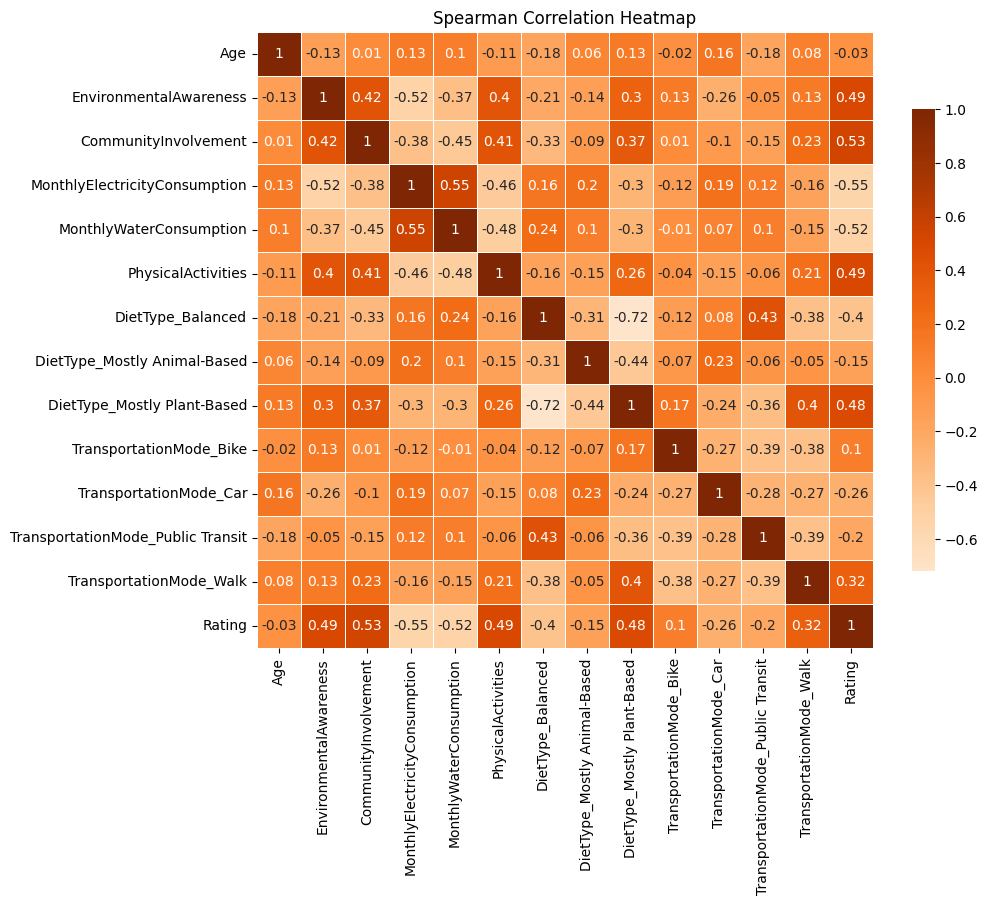

In [19]:
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(spearman_corr, annot=True, cmap='Oranges', center=0, 
            square=True, cbar_kws={"shrink": .75}, linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

From the HeatMap we can see that the variables EnvironmentalAwareness, CommunityInvolvement, PhysicalActivities, and DietType_Mostly Animal-Based, have a **moderate positive monotonic relationship** with the target variable **Rating**. Likewise, the variables MonthlyElectricityConsumption, MonthlyWaterConsumption, and DietType_Balanced, have a **moderate negative monotonic relationship** with the target variable. Additionally, it is worth it to highlight the **moderate positive relationship** among the variables around PhysicalActivies, CommunityInvolvement, and EnvironmentalAwareness.

---

## Healthcare Data

### Chronic Disease Management Patient Data

In [20]:
CHRONIC_DISEASE_DF_PATH = "data/chronic_disease_management_data_501.csv"

In [21]:
df_chronic_disease = pd.read_csv(CHRONIC_DISEASE_DF_PATH)
print(df_chronic_disease.shape)
print(df_chronic_disease.columns)
print(df_chronic_disease.dtypes)
df_chronic_disease.head()

(501, 16)
Index(['patient_id', 'age', 'gender', 'chronic_disease', 'diagnosis_date',
       'current_medications', 'last_checkup_date', 'blood_pressure',
       'blood_sugar_levels', 'lifestyle_interventions', 'education_level',
       'preventive_measures', 'quality_of_life_score', 'follow_up_schedule',
       'emp_id', 'healthcare_provider'],
      dtype='object')
patient_id                 object
age                         int64
gender                     object
chronic_disease            object
diagnosis_date             object
current_medications        object
last_checkup_date          object
blood_pressure             object
blood_sugar_levels         object
lifestyle_interventions    object
education_level            object
preventive_measures        object
quality_of_life_score       int64
follow_up_schedule         object
emp_id                     object
healthcare_provider        object
dtype: object


,patient_id,age,gender,chronic_disease,diagnosis_date,current_medications,last_checkup_date,blood_pressure,blood_sugar_levels,lifestyle_interventions,education_level,preventive_measures,quality_of_life_score,follow_up_schedule,emp_id,healthcare_provider
0,P000,36,F,Traumatic Stress Disorder,14-10-2022,"Metformin, Insulin",29-06-2024,121/80,NaN,NaN,Low,NaN,57,23-05-2024,HR8270,Dr. Lisa Parker
1,P001,39,M,Chronic Respiratory Disease,25-11-2020,Inhalers,12-06-2024,130/74,160 mg/dL,Diet,High,Routine Checkups,67,17-10-2024,TECH1860,Richard Stanley
2,P002,57,M,Diabetes,23-03-2024,"Metformin, Insulin",23-03-2024,124/77,NaN,Diet,High,Biannual Checkup,82,20-05-2024,TECH6390,Stanley Bailey PhD
3,P003,77,M,Osteoarthritis,18-06-2020,Beta-blockers,13-04-2024,139/75,NaN,NaN,High,NaN,79,20-12-2024,SAL6191,Lauren Bailey
4,P004,65,F,Multiple Sclerosis,23-05-2021,Antidepressants,13-04-2024,124/88,127 mg/dL,"Diet, Exercise",Low,Annual Screening,81,25-08-2024,HR6734,Robert Nelson


In [22]:
df_chronic_disease.isna().sum()

patient_id                   0
age                          0
gender                       0
chronic_disease              1
diagnosis_date               0
current_medications          0
last_checkup_date            0
blood_pressure               0
blood_sugar_levels         255
lifestyle_interventions    121
education_level              0
preventive_measures        129
quality_of_life_score        0
follow_up_schedule           0
emp_id                       1
healthcare_provider          0
dtype: int64

In [23]:
columns_to_verify_unique = ["patient_id", "chronic_disease", "lifestyle_interventions", "preventive_measures", "quality_of_life_score"]

In [24]:
for column in columns_to_verify_unique:
    n_unique = df_chronic_disease[column].nunique()
    unique = df_chronic_disease[column].unique()
    to_print = f"{column} | Classes {n_unique}"
    if n_unique < 20:
        to_print = f"{to_print} -> {unique}"
    else:
        to_print = f"{to_print} -> {unique[:10]} ..."
    print(to_print, "\n")

patient_id | Classes 501 -> ['P000' 'P001' 'P002' 'P003' 'P004' 'P005' 'P006' 'P007' 'P008' 'P009'] ... 

chronic_disease | Classes 13 -> ['Traumatic Stress Disorder' 'Chronic Respiratory Disease' 'Diabetes'
 'Osteoarthritis' 'Multiple Sclerosis' 'Asthma' 'Fibromyalgia'
 "Parkinson's Disease" 'Hypertension' 'Chronic Fatigue Syndrome'
 'Chronic Pain Syndrome' 'Cancer' 'Heart Disease' nan] 

lifestyle_interventions | Classes 3 -> [nan 'Diet' 'Diet, Exercise' 'Exercise'] 

preventive_measures | Classes 3 -> [nan 'Routine Checkups' 'Biannual Checkup' 'Annual Screening'] 

quality_of_life_score | Classes 40 -> [57 67 82 79 81 65 61 68 88 72] ... 



In [25]:
df_chronic_disease["quality_of_life_score"].describe()

count    501.000000
mean      69.968064
std       11.577520
min       50.000000
25%       60.000000
50%       71.000000
75%       80.000000
max       89.000000
Name: quality_of_life_score, dtype: float64

### Correlation Analysis Among Variables of Interest

In [26]:
interest_columns_df_chronic_disease = ["chronic_disease", "current_medications", "lifestyle_interventions", 
                                       "education_level", "preventive_measures", "quality_of_life_score"]

In [27]:
for column in interest_columns_df_chronic_disease:
    n_unique = df_chronic_disease[column].nunique()
    unique = df_chronic_disease[column].unique()
    to_print = f"{column} | Classes {n_unique}"
    if n_unique < 20:
        to_print = f"{to_print} -> {unique}"
    else:
        to_print = f"{to_print} -> {unique[:10]} ..."
    print(to_print, "\n")

chronic_disease | Classes 13 -> ['Traumatic Stress Disorder' 'Chronic Respiratory Disease' 'Diabetes'
 'Osteoarthritis' 'Multiple Sclerosis' 'Asthma' 'Fibromyalgia'
 "Parkinson's Disease" 'Hypertension' 'Chronic Fatigue Syndrome'
 'Chronic Pain Syndrome' 'Cancer' 'Heart Disease' nan] 

current_medications | Classes 6 -> ['Metformin, Insulin' 'Inhalers' 'Beta-blockers' 'Antidepressants'
 'ACE inhibitors' 'Painkillers'] 

lifestyle_interventions | Classes 3 -> [nan 'Diet' 'Diet, Exercise' 'Exercise'] 

education_level | Classes 3 -> ['Low' 'High' 'Medium'] 

preventive_measures | Classes 3 -> [nan 'Routine Checkups' 'Biannual Checkup' 'Annual Screening'] 

quality_of_life_score | Classes 40 -> [57 67 82 79 81 65 61 68 88 72] ... 



chronic_disease: categorical (nominal)

current_medications: categorical (nominal)

lifestyle_interventions: categorical (nominal)

education_level: categorical (ordinal)

preventive_measures: categorical (nominal)

**Consider columns of interest and remove nan values**

In [28]:
df_ch_disease_corr = df_chronic_disease[interest_columns_df_chronic_disease]
df_ch_disease_corr = df_ch_disease_corr.dropna(subset=["chronic_disease", "lifestyle_interventions", "preventive_measures"], how="any") # Remove nan values
df_ch_disease_corr

,chronic_disease,current_medications,lifestyle_interventions,education_level,preventive_measures,quality_of_life_score
1,Chronic Respiratory Disease,Inhalers,Diet,High,Routine Checkups,67
2,Diabetes,"Metformin, Insulin",Diet,High,Biannual Checkup,82
4,Multiple Sclerosis,Antidepressants,"Diet, Exercise",Low,Annual Screening,81
9,Chronic Respiratory Disease,Beta-blockers,Diet,High,Annual Screening,88
10,Parkinson's Disease,"Metformin, Insulin",Diet,Low,Routine Checkups,72
...,...,...,...,...,...,...
493,Diabetes,Beta-blockers,Exercise,Low,Routine Checkups,51
495,Cancer,ACE inhibitors,Diet,Low,Routine Checkups,58
497,Multiple Sclerosis,ACE inhibitors,Diet,Low,Biannual Checkup,60
498,Multiple Sclerosis,"Metformin, Insulin",Exercise,High,Routine Checkups,62


In [29]:
df_ch_disease_corr.isna().sum()

chronic_disease            0
current_medications        0
lifestyle_interventions    0
education_level            0
preventive_measures        0
quality_of_life_score      0
dtype: int64

#### Ordinal Categorical Variables: Label Encoding

In [30]:
ordinal_variables_ch_disease = ["education_level"]

ordinal_variables_ch_disease_map = {
    "education_level": {"High": 2, "Medium": 1, "Low": 0}
}

In [31]:
for variable in ordinal_variables_ch_disease:
    df_ch_disease_corr[variable] = df_ch_disease_corr[variable].map(ordinal_variables_ch_disease_map[variable])

df_ch_disease_corr

,chronic_disease,current_medications,lifestyle_interventions,education_level,preventive_measures,quality_of_life_score
1,Chronic Respiratory Disease,Inhalers,Diet,2,Routine Checkups,67
2,Diabetes,"Metformin, Insulin",Diet,2,Biannual Checkup,82
4,Multiple Sclerosis,Antidepressants,"Diet, Exercise",0,Annual Screening,81
9,Chronic Respiratory Disease,Beta-blockers,Diet,2,Annual Screening,88
10,Parkinson's Disease,"Metformin, Insulin",Diet,0,Routine Checkups,72
...,...,...,...,...,...,...
493,Diabetes,Beta-blockers,Exercise,0,Routine Checkups,51
495,Cancer,ACE inhibitors,Diet,0,Routine Checkups,58
497,Multiple Sclerosis,ACE inhibitors,Diet,0,Biannual Checkup,60
498,Multiple Sclerosis,"Metformin, Insulin",Exercise,2,Routine Checkups,62


#### Nominal Categorical Variables: One Hot Encoding

In [32]:
nominal_variables_ch_disase = ["chronic_disease", "current_medications", "lifestyle_interventions", "preventive_measures"]

In [33]:
df_ch_disease_corr = pd.get_dummies(df_ch_disease_corr, prefix=nominal_variables_ch_disase, columns=nominal_variables_ch_disase)
quality_of_life_score_column = df_ch_disease_corr.pop("quality_of_life_score")
df_ch_disease_corr.insert(df_ch_disease_corr.shape[1], "quality_of_life_score", quality_of_life_score_column)
df_ch_disease_corr

,education_level,chronic_disease_Asthma,chronic_disease_Cancer,chronic_disease_Chronic Fatigue Syndrome,chronic_disease_Chronic Pain Syndrome,chronic_disease_Chronic Respiratory Disease,chronic_disease_Diabetes,chronic_disease_Fibromyalgia,chronic_disease_Heart Disease,chronic_disease_Hypertension,...,current_medications_Inhalers,"current_medications_Metformin, Insulin",current_medications_Painkillers,lifestyle_interventions_Diet,"lifestyle_interventions_Diet, Exercise",lifestyle_interventions_Exercise,preventive_measures_Annual Screening,preventive_measures_Biannual Checkup,preventive_measures_Routine Checkups,quality_of_life_score
1,2,False,False,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,67
2,2,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,82
4,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,81
9,2,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,88
10,0,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,True,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,51
495,0,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,58
497,0,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,60
498,2,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,62


### Variables Correlation (Spearman Method)

In [34]:
spearman_corr_ch_d = df_ch_disease_corr.corr(method='spearman')
spearman_corr_ch_d = spearman_corr_ch_d.apply(lambda value: round(value, 2))

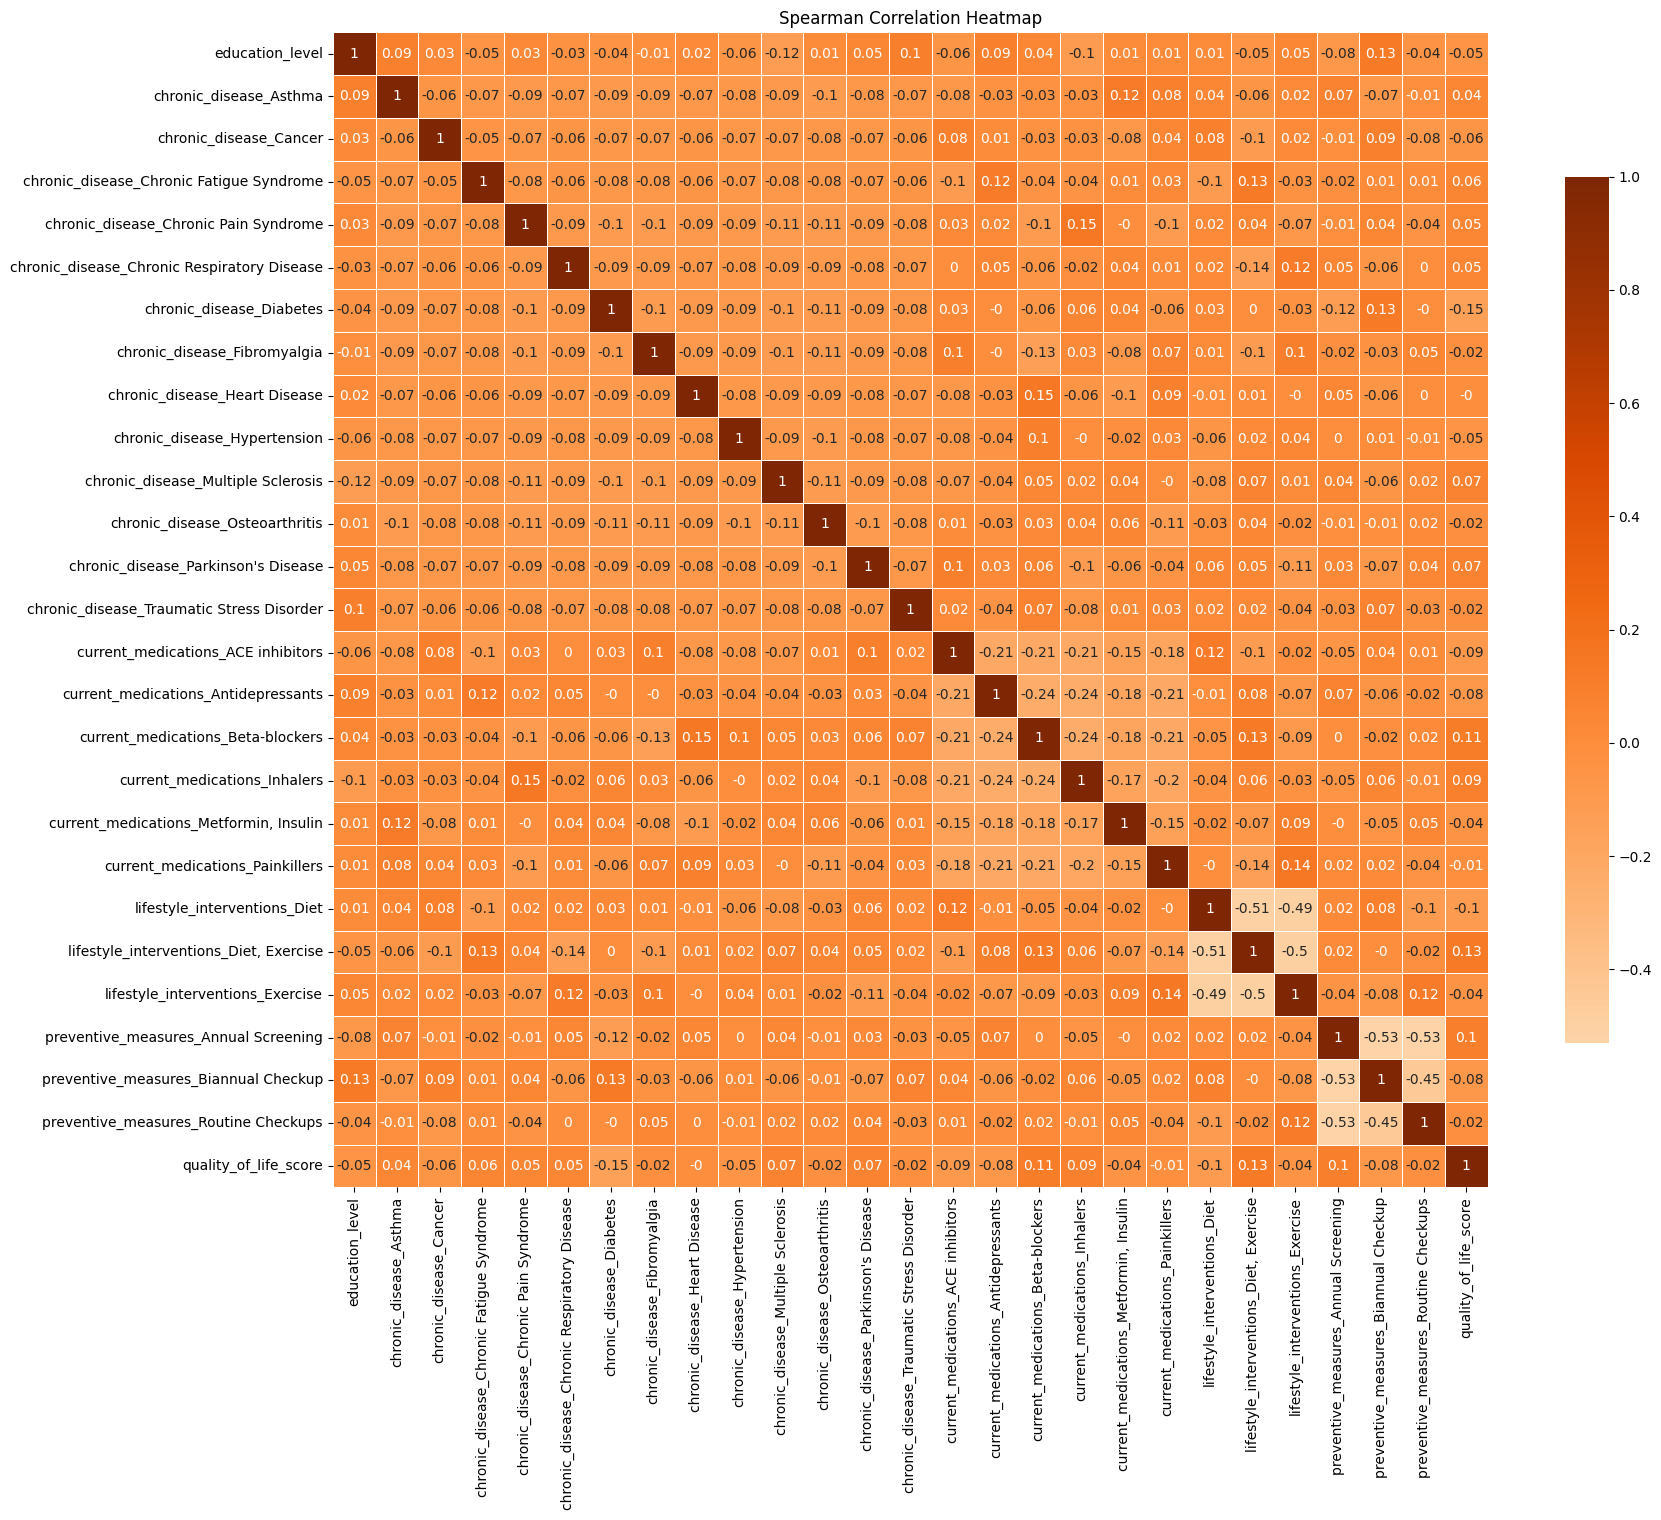

In [35]:
plt.figure(figsize=(20, 15))  # Set the size of the figure
sns.heatmap(spearman_corr_ch_d, annot=True, cmap='Oranges', center=0, 
            square=True, cbar_kws={"shrink": .75}, linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

From the HeatMap, we can see that there is not a significant correlation among the variables and what would be the potential target variable for this dataset: quality_of_life_score.